In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv("/content/DataKasusCoronaIndonesia.csv",parse_dates=["Date"],index_col="Province")
df.columns = df.columns.str.replace(' ','_')
df.head()

,Date,Location_ISO_Code,Location,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,...,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Total_Deaths_per_100rb,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Province,,,,,,,,,,,,,,,,,,,,,
DKI Jakarta,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
DKI Jakarta,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
NaN,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
Riau,2020-03-02,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
DKI Jakarta,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31822 entries, DKI Jakarta to nan
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         31822 non-null  datetime64[ns]
 1   Location_ISO_Code            31822 non-null  object        
 2   Location                     31822 non-null  object        
 3   New_Cases                    31822 non-null  int64         
 4   New_Deaths                   31822 non-null  int64         
 5   New_Recovered                31822 non-null  int64         
 6   New_Active_Cases             31822 non-null  int64         
 7   Total_Cases                  31822 non-null  int64         
 8   Total_Deaths                 31822 non-null  int64         
 9   Total_Recovered              31822 non-null  int64         
 10  Total_Active_Cases           31822 non-null  int64         
 11  Location_Level               31822 non

In [ ]:
class ColumnData:
    date = 'Date'
    province = 'Location'
    island = 'Island'
    cases = 'Total_Cases'
    deaths = 'Total_Deaths'
    recovered = 'Total_Recovered'
    actives_cases = 'Total_Active_Cases'
    population = 'Population'
    area = 'Area_(km2)'
    mortality = 'Mortality'
    density = 'Population_Density'

In [ ]:
# Mendefinisikan create bins untuk splitting & binning data
def create_bins(df, columns, q=5):
    for column in columns:
        df[column] = pd.qcut(df[column], q, duplicates='drop').cat.codes

In [ ]:
# Mendefinisikan normalize_data untuk normalizing data
def normalize_data(df, columns):
    minMaxScaler = MinMaxScaler()
    df[columns] = minMaxScaler.fit_transform(d[columns])

In [ ]:
data = df[[
    ColumnData.date,
    ColumnData.province,
    ColumnData.island,
    ColumnData.cases,
    ColumnData.deaths,
    ColumnData.recovered,
    ColumnData.actives_cases,
    ColumnData.population,
    ColumnData.area,
    ColumnData.density
]]

In [ ]:
# Menghapus jika ada data yang kosong
data = data.dropna(axis=0, how="any")

# Membuat format data pada tanggal menjadi date.
data[ColumnData.date] = pd.to_datetime(data.Date, infer_datetime_format=True).dt.date

# Membuat kolom baru yaitu ‘Mortality’
data[ColumnData.mortality] = data[ColumnData.deaths] / data[ColumnData.cases]

In [ ]:
dfl = data[
    [ColumnData.date, ColumnData.cases, ColumnData.deaths, ColumnData.recovered]
].groupby(ColumnData.date).sum().reset_index()

dfl = dfl[(dfl[ColumnData.cases] >= 100)].melt(id_vars=ColumnData.date,
                                               value_vars=[ColumnData.cases, ColumnData.deaths, ColumnData.recovered])

# Visualisasi jumlah perkembangan kasus dengan line plot
vis_lp = px.line(dfl, x=ColumnData.date, y='value', color='variable')
vis_lp.update_layout(title='COVID-19 in Indonesia: total number of cases over time',
                     xaxis_title='Indonesia', yaxis_title='Number of cases',
                     legend=dict(x=0.02, y=0.98))
vis_lp.show()

In [ ]:
pd.options.mode.chained_assignment = None
limit = 5
group = data.groupby(ColumnData.province)
t = group.tail(1).sort_values(ColumnData.cases, ascending=False).set_index(ColumnData.province).drop(
    columns=[ColumnData.date])

s = data[(data[ColumnData.province].isin([i for i in t.index[:limit]]))]
s = s[(s[ColumnData.cases] >= 100)]

# vis_lp = visualization line plot
vis_lp2 = px.line(s, x=ColumnData.date, y=ColumnData.cases, color=ColumnData.province)
vis_lp2.update_layout(title='COVID-19 in Indonesia: total number of cases over time',
                      xaxis_title=ColumnData.date, yaxis_title='Number of cases',
                      legend_title='<b>Top %s provinces</b>' % limit,
                      legend=dict(x=0.02, y=0.98))
vis_lp2.show()

In [ ]:
heatmap = data[(data[ColumnData.cases] >= 100)].sort_values([ColumnData.date, ColumnData.province])
vis_hmap = go.Figure(data=go.Heatmap(
    z=heatmap[ColumnData.cases],
    x=heatmap[ColumnData.date],
    y=heatmap[ColumnData.province],
    colorscale='Viridis'))

vis_hmap.update_layout(
    title='COVID-19 in Indonesia: number of cases over time', xaxis_nticks=45)

vis_hmap.show()

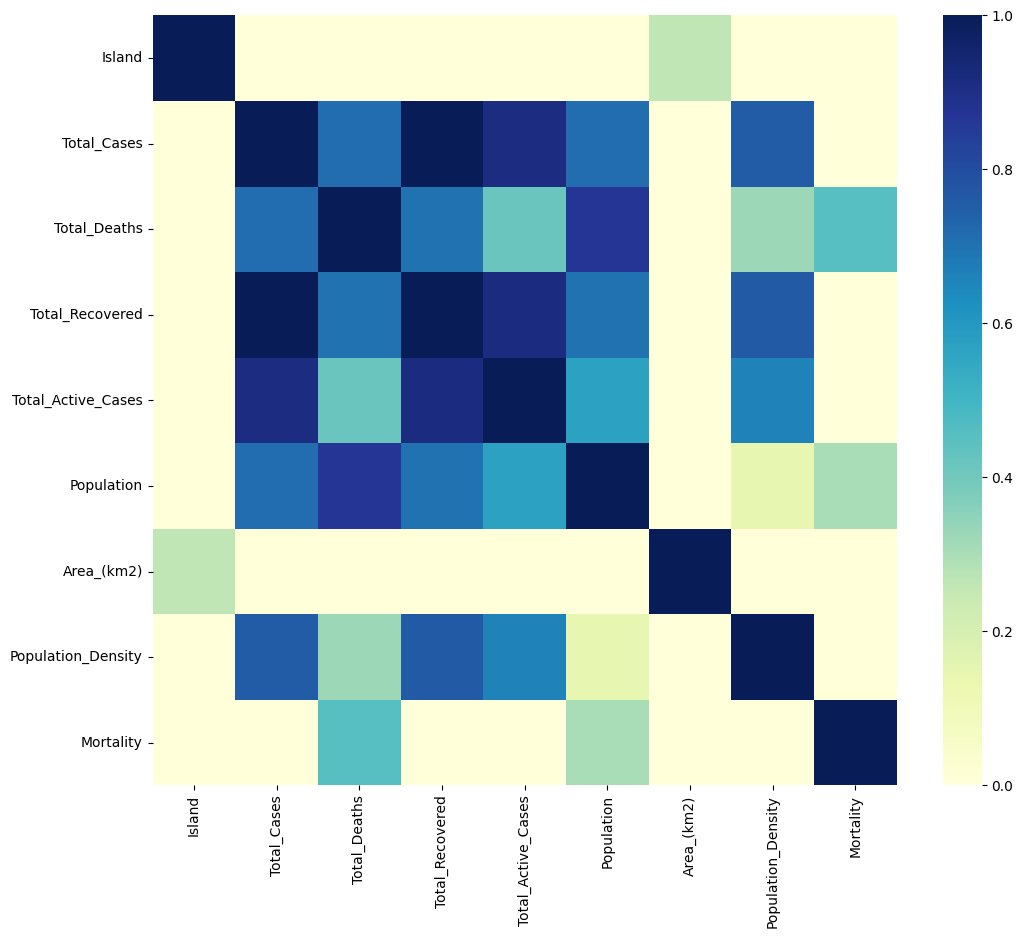

In [ ]:
t.replace({'Jawa': 0, 'Sulawesi': 1, 'Kalimantan': 2, 'Sumatera': 3, 'Maluku': 4, 'Papua': 5, 'Nusa Tenggara': 6},
          inplace=True)

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(t.corr(), vmin=0, cmap='YlGnBu')
plt.show()

In [ ]:
corr = t.corr().iloc[[0, 1]].transpose()
corr = corr[(corr[ColumnData.cases] > 0.25)].sort_values(ColumnData.cases, ascending=False)
features = corr.index.tolist()
features.append(ColumnData.mortality)
print('Selected features:', features)

d = t[features].copy()
d.head()

Selected features: ['Total_Cases', 'Total_Recovered', 'Total_Active_Cases', 'Population_Density', 'Total_Deaths', 'Population', 'Mortality']


,Total_Cases,Total_Recovered,Total_Active_Cases,Population_Density,Total_Deaths,Population,Mortality
Location,,,,,,,
DKI Jakarta,1412511,1386134,10864,16334.31,15513,10846145,0.010983
Jawa Barat,1173731,1144358,13436,1276.55,15937,45161325,0.013578
Jawa Tengah,636409,601517,1403,1108.64,33489,36364072,0.052622
Jawa Timur,601545,569003,778,846.78,31764,40479023,0.052804
Banten,333875,328482,2443,1109.64,2950,10722374,0.008836


In [ ]:
create_bins(d, [
    ColumnData.cases,
    ColumnData.deaths,
    ColumnData.recovered,
    ColumnData.actives_cases,
    ColumnData.population,
    ColumnData.mortality,
    ColumnData.density
], q=7)

normalize_data(d, d.columns)
d.head()

,Total_Cases,Total_Recovered,Total_Active_Cases,Population_Density,Total_Deaths,Population,Mortality
Location,,,,,,,
DKI Jakarta,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.0
Jawa Barat,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.0
Jawa Tengah,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0
Jawa Timur,1.0,1.0,1.0,0.833333,1.000000,1.000000,1.0
Banten,1.0,1.0,1.0,1.000000,0.666667,0.833333,0.0


In [ ]:
#selecting features
X = d[['Mortality', 'Total_Cases','Total_Active_Cases', 'Population_Density', 'Population', 'Total_Deaths']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

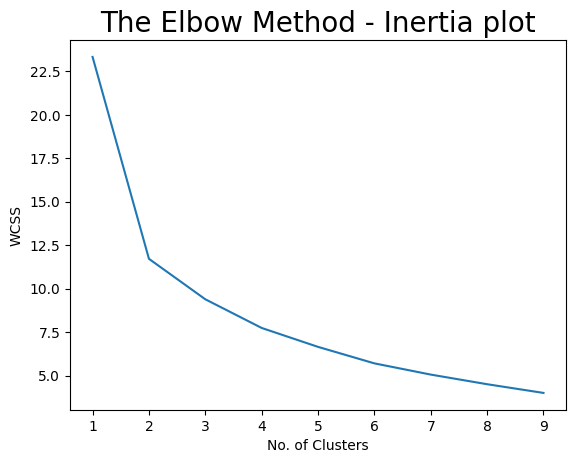

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Elbow Method - Inertia plot
inertia = []
#looping the inertia calculation for each k
for k in range(1, 10):
    #Assign KMeans as cluster_model
    cluster_model = KMeans(n_clusters = k, random_state = 24)
    #Fit cluster_model to X
    cluster_model.fit(X)
    #Get the inertia value
    inertia_value = cluster_model.inertia_
    #Append the inertia_value to inertia list
    inertia.append(inertia_value)
##Inertia plot
plt.plot(range(1, 10), inertia)
plt.title('The Elbow Method - Inertia plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6)
pred = kmeans.fit_predict(d[d.columns])
t['K-means'], d['K-means'] = [pred, pred]
d[d.columns].sort_values(['K-means', ColumnData.mortality, ColumnData.cases, ColumnData.actives_cases, ColumnData.density, ColumnData.deaths, ColumnData.population, ColumnData.recovered], ascending=False).style.background_gradient(
    cmap='YlGnBu', low=0, high=0.2)
vis_tmap = px.treemap(t.reset_index(), path=['K-means', ColumnData.province], values=ColumnData.cases)
vis_tmap.update_layout(title='K-means clusters by cases')
vis_tmap.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
vis_tmap = px.treemap(t.reset_index(), path=['K-means', ColumnData.province], values=ColumnData.mortality)
vis_tmap.update_layout(title='K-means clusters by mortality')
vis_tmap.show()

In [ ]:
c = t.sort_values(['K-means', ColumnData.cases], ascending=False)
data = [go.Bar(x=c[(c['K-means'] == i)].index, y=c[(c['K-means'] == i)][ColumnData.cases],
               text=c[(c['K-means'] == i)][ColumnData.cases], name=i) for i in range(0, 6)]

vis_bar = go.Figure(data=data)
vis_bar.update_layout(title='K-means Clustering: number of cases by cluster',
                      xaxis_title='Indonesia State', yaxis_title='Deaths per case')
vis_bar.show()

In [ ]:
# visualization using bar chart
# visualization mortality rate by clusters
c = t.sort_values(['K-means', ColumnData.mortality], ascending=False)
data = [go.Bar(x=c[(c['K-means'] == i)].index, y=c[(c['K-means'] == i)][ColumnData.mortality],
               text=c[(c['K-means'] == i)][ColumnData.mortality], name=i) for i in range(0, 6)]
data.append(
    go.Scatter(
        x=t.sort_values(ColumnData.mortality, ascending=False).index,
        y=np.full((1, len(t.index)), 0.03).tolist()[0],
        marker_color='black',
        name='Indonesian avg'
    )
)

vis_bar2 = go.Figure(data=data)
vis_bar2.update_layout(title='K-means Clustering: mortality rate by cluster',
                       xaxis_title='Indonesian states', yaxis_title='Deaths per case')
vis_bar2.show()